In [2]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import cv2
import numpy as np
from glob import glob
from skimage.io import imread

In [3]:
base = '../dados/romuere/ultrassom/base_ovinos/'
files = glob(base+'collection/Annotations/users/luizifgueiredo/*.xml')

In [4]:
len(files)

0

In [90]:
for f in files:
    tree = ET.parse(f)
    root = tree.getroot()
    x = []
    y = []
    for r in root.iter('x'):
        x.append(r.text)
    for r in root.iter('y'):
        y.append(r.text)

    pts = np.array([[int(a),int(b)] for(a,b) in zip(x,y)])
    shape = np.zeros(2,dtype=np.int)
    shape[0] = int([a.text for a in root.iter('nrows')][0])
    shape[1] = int([a.text for a in root.iter('ncols')][0])
    canvas = np.zeros((shape[0], shape[1]), np.uint8)
    cv2.drawContours(canvas, [pts],-1, (255), -1)
    
    contour, hier = cv2.findContours(canvas, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contour:
        cv2.drawContours(canvas,[cnt],0,255,-1)
    
    im_name = f.split('/')[-1][:-4]
    canvas_ = canvas[42:551,201:707]
    cv2.imwrite(base+'masks/'+im_name+'.bmp',canvas_)
    
    im_orig = cv2.imread(base+'original/'+im_name+'.bmp')
    segmentada = im_orig[:,:,0]*canvas
    segmentada = segmentada[42:551,201:707]
    cv2.imwrite(base+'segmentada/'+im_name+'.bmp',segmentada)
    
    im_orig = im_orig[42:551,201:707]
    cv2.imwrite(base+'cropped/'+im_name+'.bmp',im_orig)
    

In [88]:
im_name

'1198'

In [89]:
plt.imshow(im_orig)

In [54]:
im_orig is None

True

In [46]:
'234romuere'.upper()

'234ROMUERE'

In [16]:
plt.imshow(canvas)

In [20]:
'original/'+im_name

'original/1903711018.bmp'

In [22]:
plt.imshow(im_orig)

In [ ]:
157, 69
480,566

In [35]:
file_imgs = glob('masks/*.bmp')
for f in file_imgs:
    cv2.imread(f)
    crop = im_orig[69:566,157:480,:]
    cv2.imwrite(f,crop)

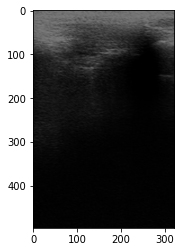

In [27]:
plt.imshow(crop)

In [29]:
cv2.imwrite('teste.png',crop)

True

In [31]:
f.replace('users','teste')

'collection/Annotations/teste/luizifgueiredo/olhodelombo/lombo/1910609004.xml'

In [15]:
file_imgs = glob('masks/*.bmp')

In [16]:
file_imgs

['masks/1100212088.bmp',
 'masks/1901208009.bmp',
 'masks/534010122.bmp',
 'masks/1912212035.bmp',
 'masks/1816308457.bmp',
 'masks/1606511049.bmp',
 'masks/1903710008.bmp',
 'masks/1903710036.bmp',
 'masks/1101608119.bmp',
 'masks/1901206033.bmp',
 'masks/1905011014.bmp',
 'masks/1903310028.bmp',
 'masks/1903312005.bmp',
 'masks/1101611266.bmp',
 'masks/1101611273.bmp',
 'masks/1903310001.bmp',
 'masks/1903310029.bmp',
 'masks/1907707084.bmp',
 'masks/1100212059.bmp',
 'masks/1903310005.bmp',
 'masks/1903310039.bmp',
 'masks/503311001.bmp',
 'masks/1877510561.bmp',
 'masks/1905010051.bmp',
 'masks/1905010050.bmp',
 'masks/1877510560.bmp',
 'masks/1903705007.bmp',
 'masks/1901211013.bmp',
 'masks/1100208028.bmp',
 'masks/1903710026.bmp',
 'masks/1105110003.bmp',
 'masks/1100212072.bmp',
 'masks/1100212066.bmp',
 'masks/1101609177.bmp',
 'masks/1100911009.bmp',
 'masks/1901206034.bmp',
 'masks/1903310007.bmp',
 'masks/1901208025.bmp',
 'masks/1101609200.bmp',
 'masks/1903307023.bmp',
 '

In [ ]:
im_orig

In [98]:
import cv2

desired_size = 320
#im_pth = "/home/jdhao/test.jpg"

#im = cv2.imread(im_pth)
im = im_orig
old_size = im.shape[:2] # old_size is in (height, width) format

ratio = float(desired_size)/max(old_size)
new_size = tuple([int(x*ratio) for x in old_size])

# new_size should be in (width, height) format

im = cv2.resize(im, (new_size[1], new_size[0]))

delta_w = desired_size - new_size[1]
delta_h = desired_size - new_size[0]
top, bottom = delta_h//2, delta_h-(delta_h//2)
left, right = delta_w//2, delta_w-(delta_w//2)

new_im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT)

In [99]:
new_size

(320, 318)

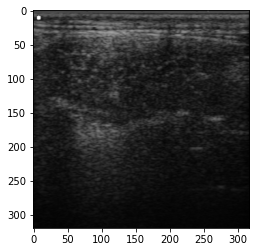

In [100]:
plt.imshow(im)

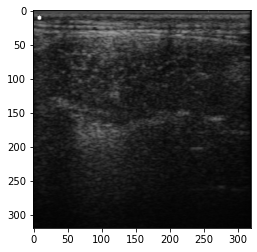

In [108]:
plt.imshow(new_im)

In [102]:
new_im.shape

(320, 320, 3)

In [103]:
im.shape

(320, 318, 3)

In [104]:
im_orig.shape

(509, 506, 3)